# Flat-field analysis

The input is a set of 90 flat field raw frames made with the device (reference). 

The data acquisition was conducted in three subsets of 30 frames each, with the camera setup rotated 90 degrees in between each set. The purpose is to cancel out differences in the overall ligth distribution caused by uneven illumination of the setup (e.g. the Sun shining sideways on the setup).

In between each individual picture, the diffuser cover was slightly repositioned and/or rotated. The purpose is to average over high-frequency uneven features in the light distribution coming from the diffuser (e.g. caused by scratches and stains on the plastic lid).

The three data subsets are combined separately, and differences in between them can tell us something about the overal quality of the flat field that is built by combining all the 90 frames together.

We used a standard setting of ISO 100, which corresponds to gain=1. The 14mm lens was held at full aperture (the same used for the light frames), and shutter spedd adjusted automatically with the A (Aperture priority) setting so as to generate properly scaled histograms in the three colors.

In [1]:
%pylab notebook
%matplotlib notebook
import os, glob
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import rawpy

Populating the interactive namespace from numpy and matplotlib


## Utility functions 

In [2]:
# Function that combines raw frames from a file list, using a provided numpy 
# combination function. It returns a raw frame with the combined result.
def combine_arrays(file_list, combination_function=np.average):
    stack = None
    for fname, i in zip(file_list, range(len(file_list))):

        raw = rawpy.imread(fname)
        array = raw.raw_image

        if stack is None:            
            stack = np.zeros(shape=(array.shape[0],array.shape[1],len(file_list)), dtype=float)

        stack[:,:,i] = array

    return combination_function(stack, axis=2)

In [3]:
# Function that generates plots from a list of files with raw frames.
# The plots are all lined up in a single row. That way, up to 3 plots
# can be placed on the visible window in a notebook page.
# The title string is used to generate the plot titles
def plot_multiple(input_list, title):
    figsize(10,3)
    sequence_index = [i+1 for i in range(len(input_list))]

    fig = plt.figure() 
    ax = None
    for array, name, i in zip(input_list, sequence_index, range(len(input_list))):
        if ax is None:
            ax = fig.add_subplot(1, len(input_list), i+1)
        else:
            ax1 = fig.add_subplot(1, len(input_list), i+1, sharex=ax, sharey=ax)
        ax.set_title(sequence_index[i])    

        plt.imshow(array)
        plt.colorbar()

    fig.suptitle(title)
    plt.show()

In [4]:
# Process the flat fields. The entire set of file names is provided as a single list.
# Three slices are used to select three subsets within that list. 'Name' is used to
# generate the plot titles.
def process(list_raw, slice1, slice2, slice3, name, combination_function=np.average):
    combined_flat_1 = combine_arrays(list_raw[slice1], combination_function)
    combined_flat_2 = combine_arrays(list_raw[slice2], combination_function)
    combined_flat_3 = combine_arrays(list_raw[slice3], combination_function)
    
    diff_1 = combined_flat_1 - combined_flat_3
    diff_2 = combined_flat_2 - combined_flat_3
    diff_3 = combined_flat_1 - combined_flat_2

    plot_multiple([combined_flat_1, combined_flat_2, combined_flat_3], 'Combined ' + name)
    plot_multiple([diff_1, diff_2, diff_3], 'Differences')

## Define path to data files

In [5]:
path = '../astrophotography_data/MilkyWayPrettyBoy/flats/'

## Analysis

<IPython.core.display.Javascript object>


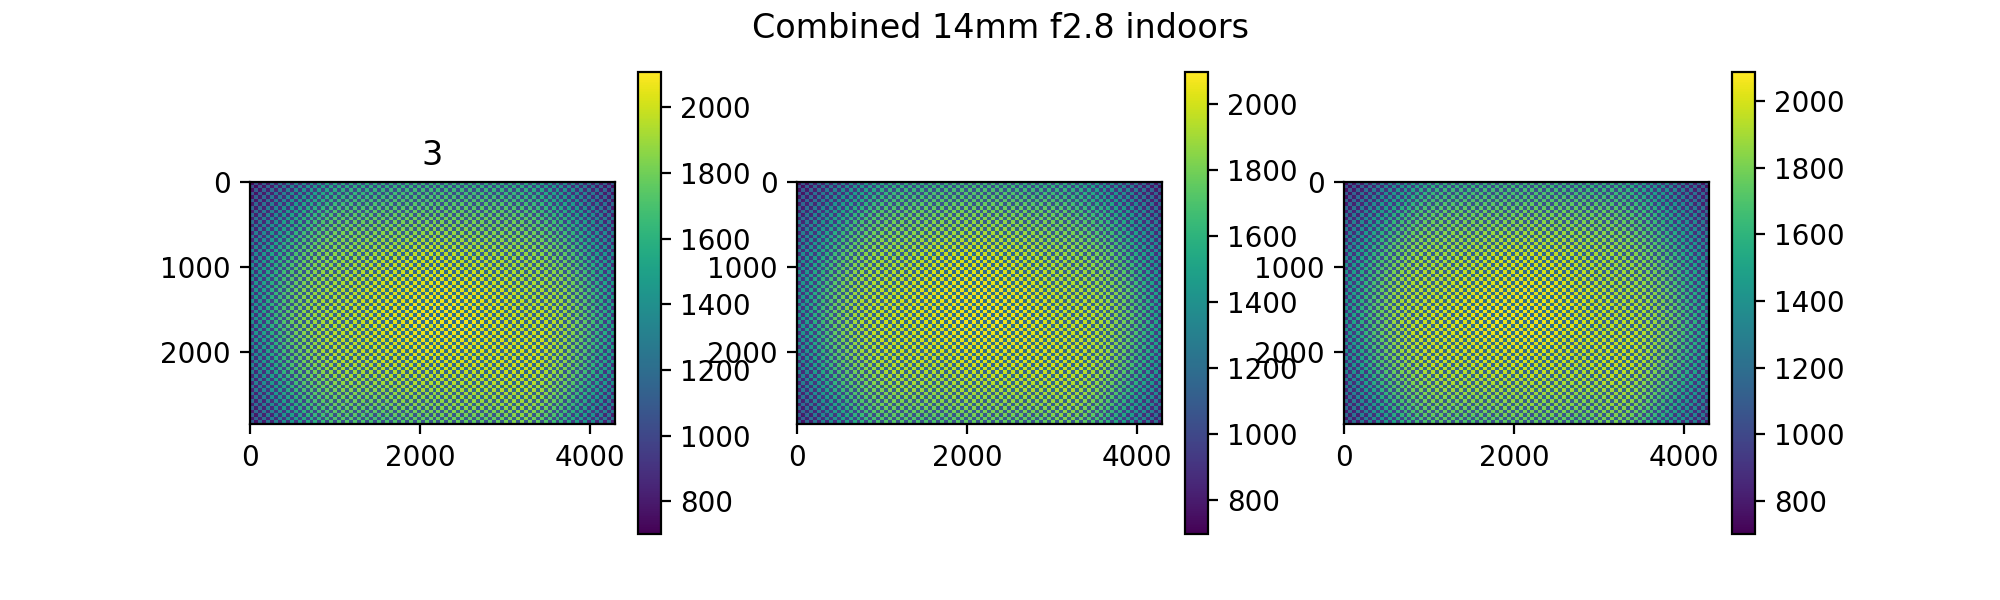

<IPython.core.display.Javascript object>


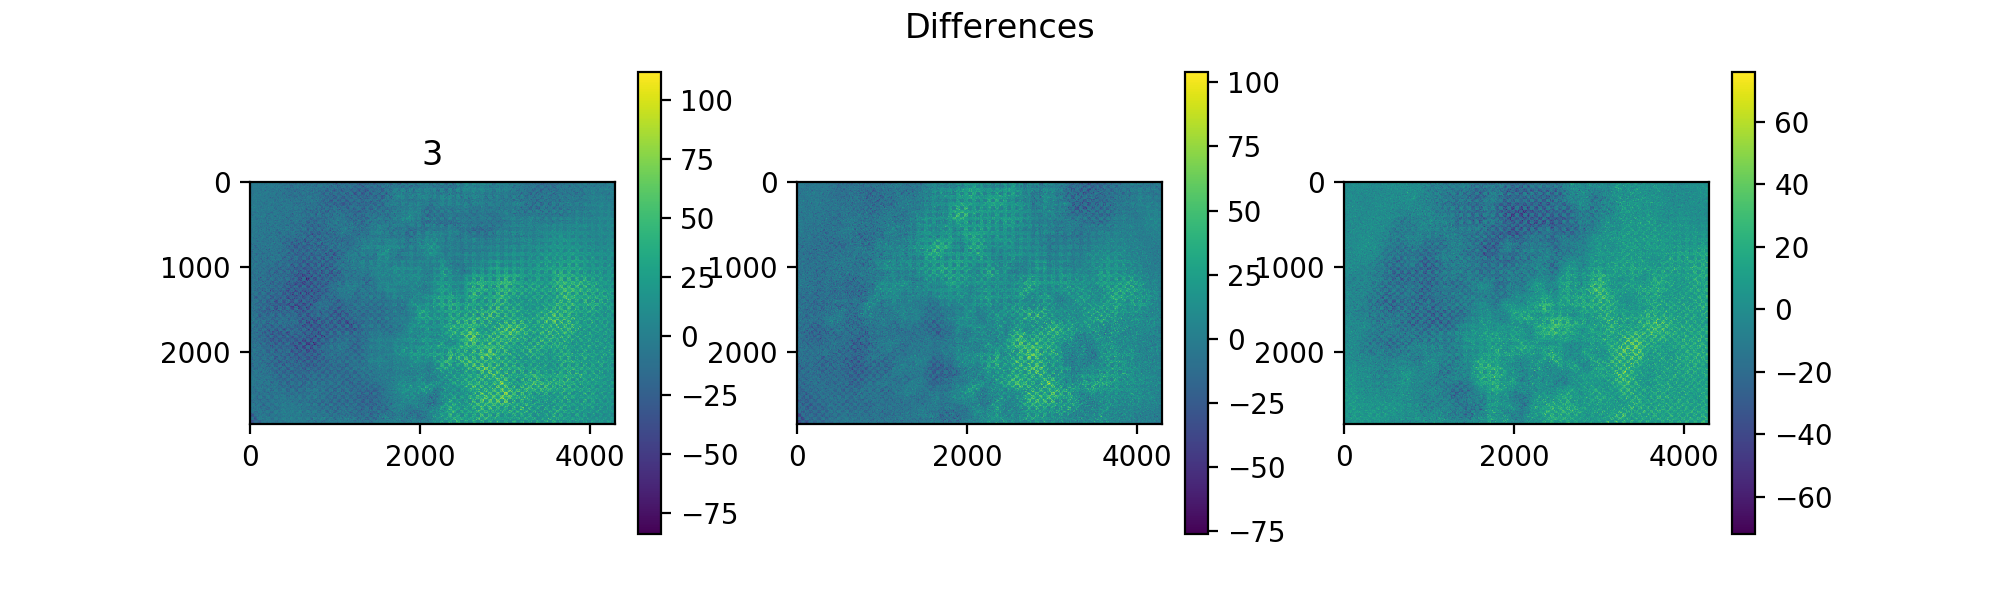

In [6]:
# Flats made indoors - 14mm f2.8
list_raw = glob.glob(path + 'raw_1/*.ARW')
process(list_raw, slice(0,30), slice(31,60), slice(61,90), '14mm f2.8 indoors', combination_function=np.median)

<IPython.core.display.Javascript object>


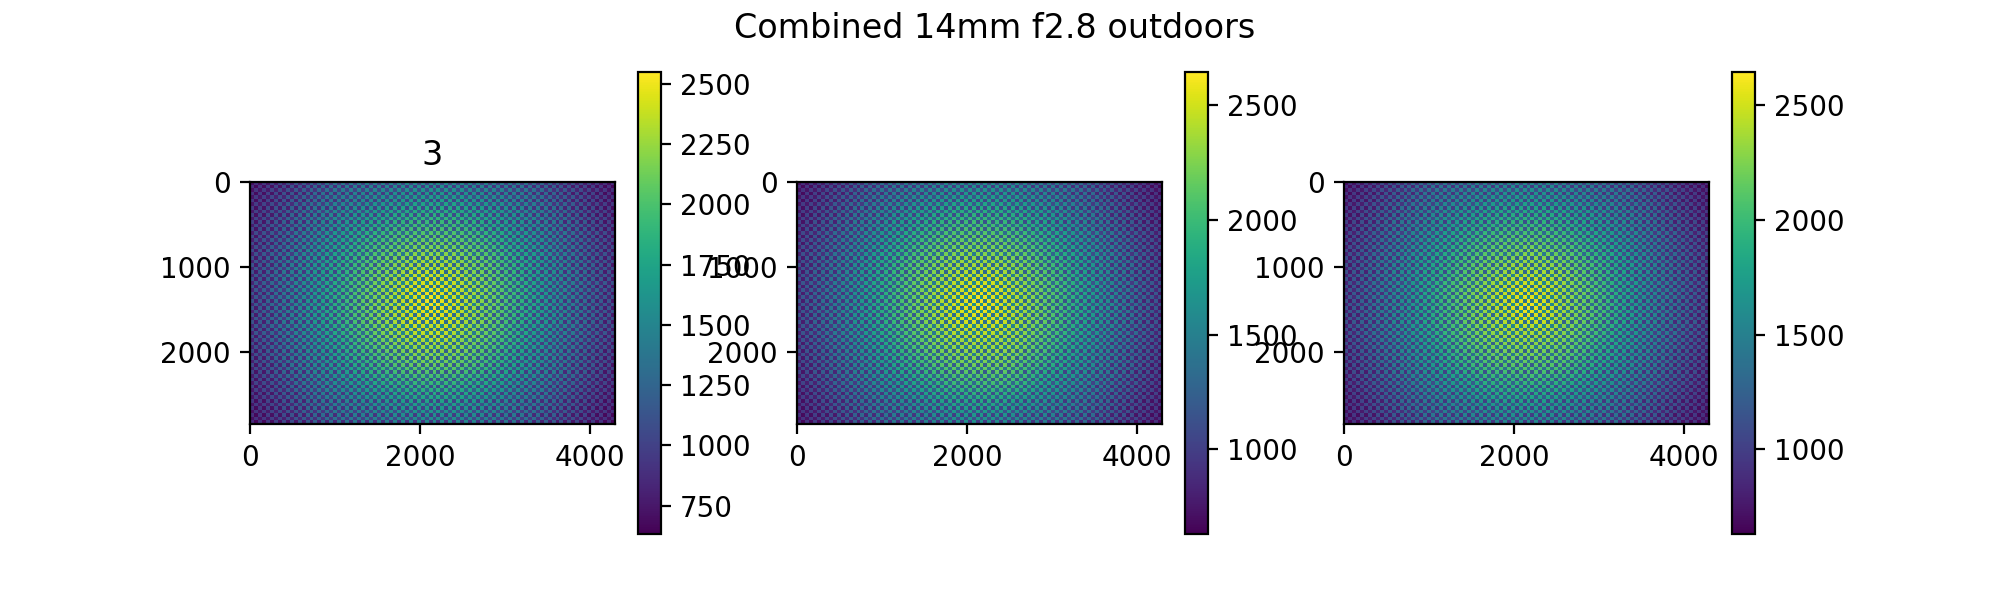

<IPython.core.display.Javascript object>


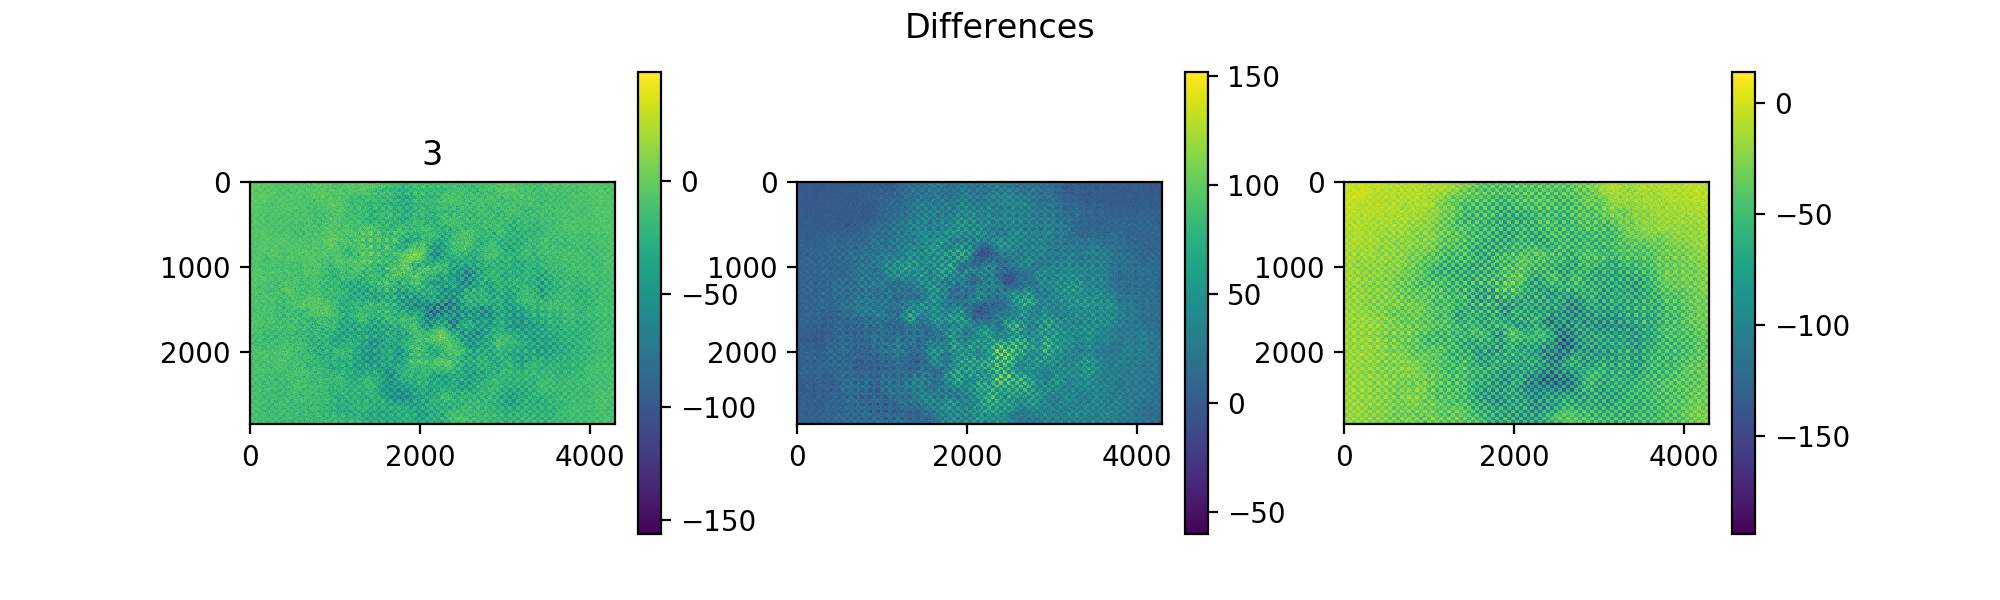

In [7]:
# Flats made outdoors - 14mm f2.8
list_raw = glob.glob(path + 'raw_2/*.ARW')
process(list_raw, slice(0,30), slice(31,60), slice(61,90), '14mm f2.8 outdoors ', combination_function=np.median)

<IPython.core.display.Javascript object>


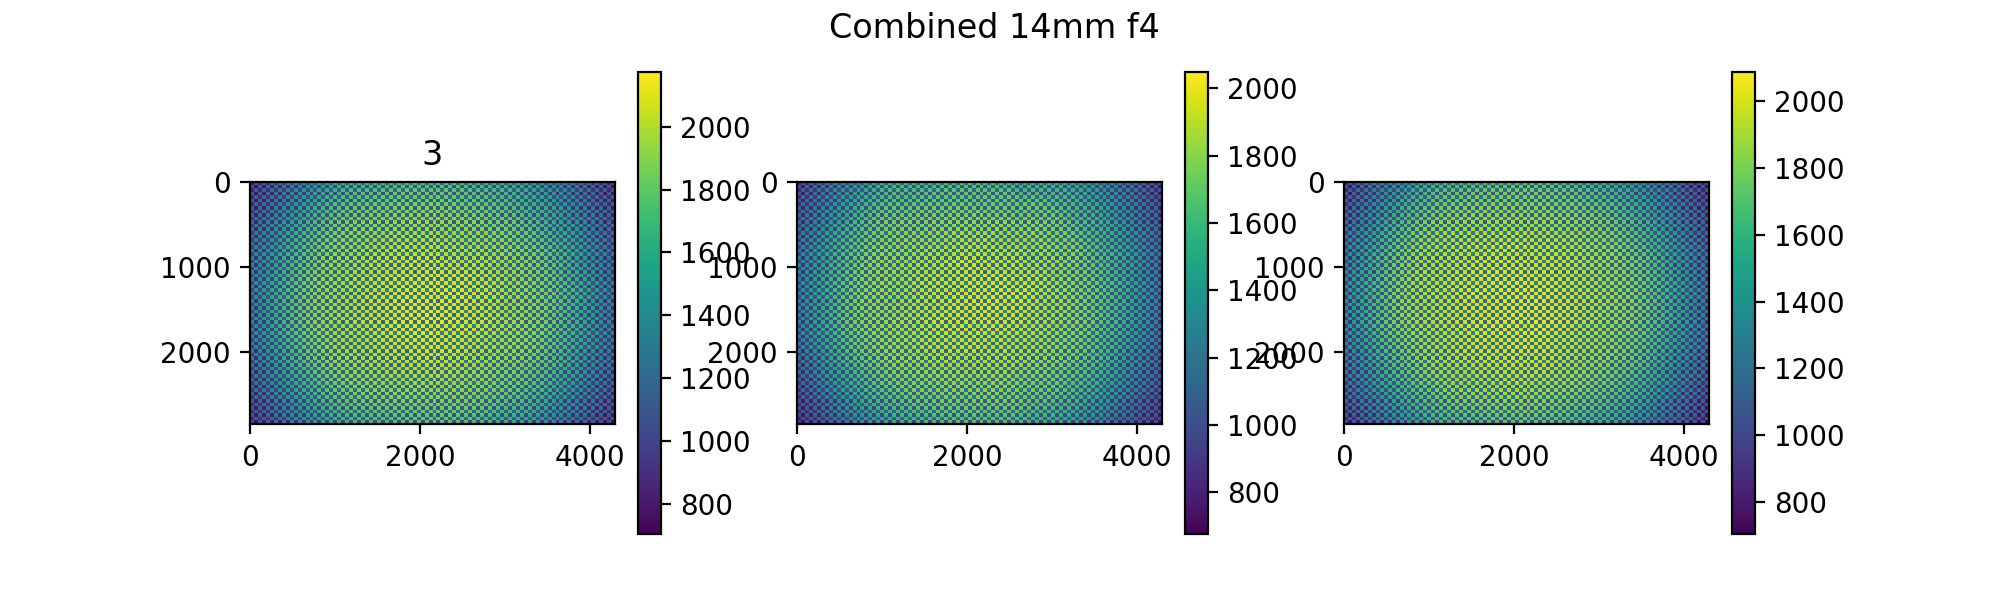

<IPython.core.display.Javascript object>


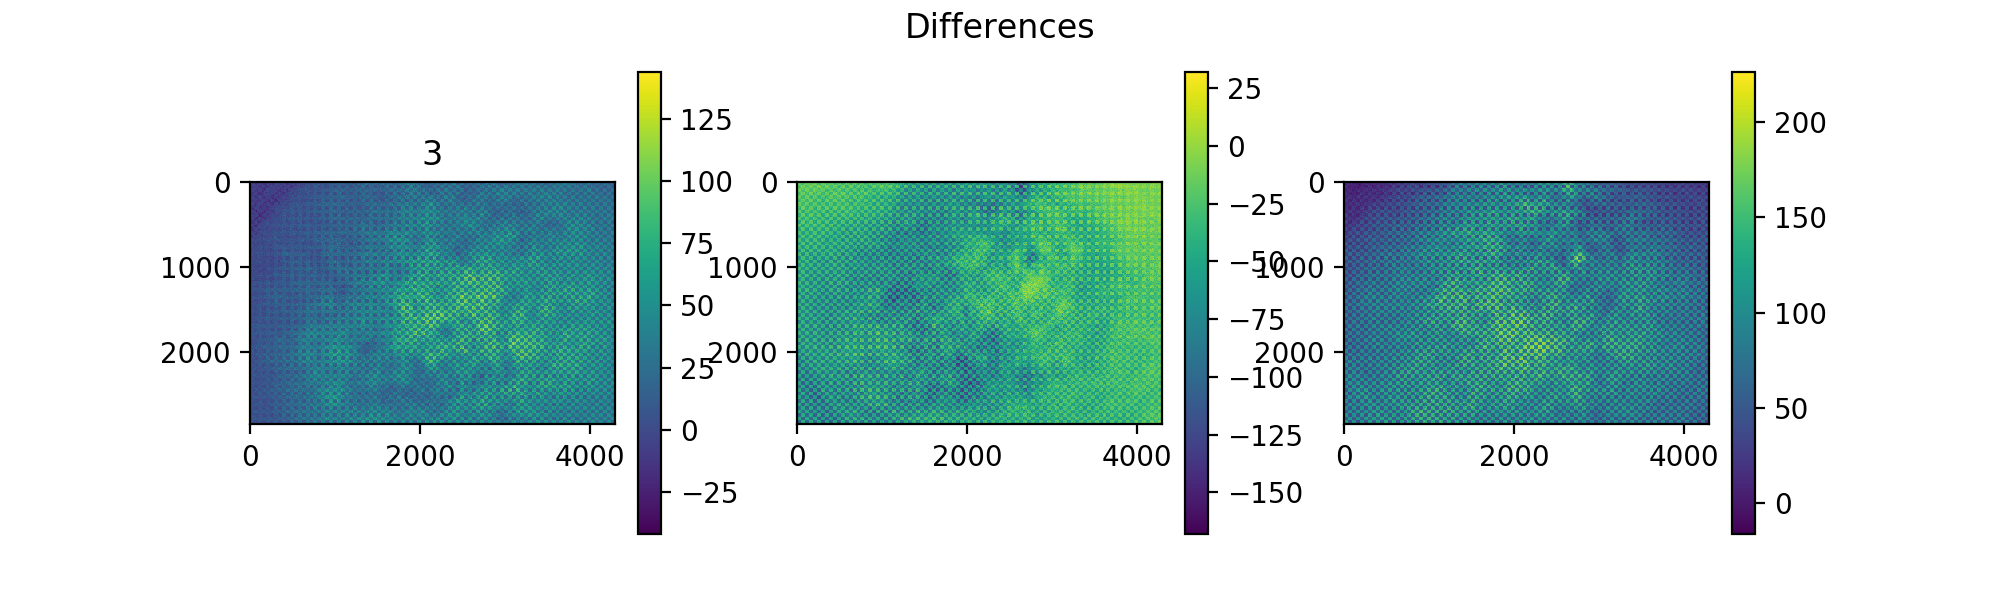

In [8]:
# Flats made outdoors - 14mm f4 for comparison with the f2.8 data sets.
list_raw = glob.glob(path + 'raw_f4/*.ARW')
process(list_raw, slice(0,30), slice(31,60), slice(61,90), '14mm f4 ', combination_function=np.median)